<a href="https://colab.research.google.com/github/jahnavi1thoom/unsupervised-ml/blob/main/featureSelection(Dim_Red).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VAriance Threshold**



In [1]:
import pandas as pd
data=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,10000],
    'country_code':[1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,10000,1


here country_code is unimportant feature .It has very low variance i.e useless

In [3]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(data)

selected_features=data.columns[selector.get_support()]
print("selected featres:",selected_features)


selected featres: Index(['age', 'salary'], dtype='object')


Scenario: Hospital Disease Prediction System
You are building a machine learning model to predict whether a patient has a particular disease.
The dataset contains the following features:
Age
Blood Pressure
Cholesterol Level
Gender
Country Code
Hospital ID
Machine Version Used for Testing
After initial exploration, you notice:
Country Code is 100% “India” for all records
Machine Version is 99% “v2.1” and only 1% “v2.2”
Hospital ID is same for all patients
❓ Question:
Which feature selection technique would you apply first?
Which features would likely be removed?
Why is removing these features important before training?
What problem might occur if you keep them?

In [4]:
df=pd.DataFrame({
    'age':[21,24,34,45,32],
    'blood_pressure':[120,140,120,90,110],
    'cholesterol_level':[120,140,120,90,110],
    'gender':['f','m','f','f','m'],
    'country_code':['india','india','india','india','india'],
    'hospital_id':[1]*5,
    'machine_version':['v2.1','v2.1','v2.1','v2.2','v2.1'],

})

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['country_code']=le.fit_transform(df['country_code'])
df['machine_version']=le.fit_transform(df['machine_version'])
df

,age,blood_pressure,cholesterol_level,gender,country_code,hospital_id,machine_version
0,21,120,120,0,0,1,0
1,24,140,140,1,0,1,0
2,34,120,120,0,0,1,0
3,45,90,90,0,0,1,1
4,32,110,110,1,0,1,0


In [12]:
df.dtypes

,0
age,int64
blood_pressure,int64
cholesterol_level,int64
gender,int64
country_code,int64
hospital_id,int64
machine_version,int64


In [14]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.3)
selected_data=selector.fit_transform(df)
selected_features=df.columns[selector.get_support()]
print("selected featres:",selected_features)

selected featres: Index(['age', 'blood_pressure', 'cholesterol_level'], dtype='object')


# **Correlation Coefficient**

In [15]:
import pandas as pd
import numpy as np
data=pd.DataFrame({
    'size_sqt':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000],

})
data

,size_sqt,titles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [16]:
correlation_mat=data.corr()
print(correlation_mat)

              size_sqt  titles_count  price
size_sqt           1.0           1.0    1.0
titles_count       1.0           1.0    1.0
price              1.0           1.0    1.0


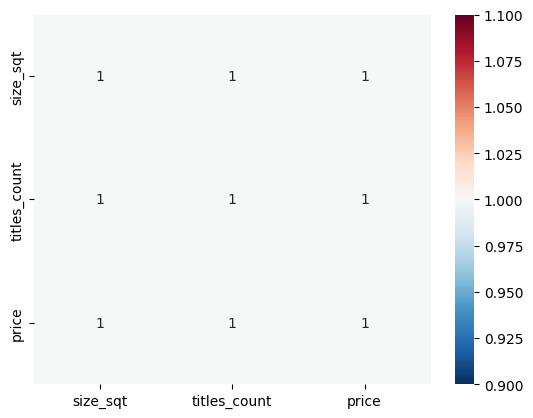

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_mat,annot=True,cmap='RdBu_r')
plt.show()

In [20]:
#removing highly correlated features(>0.9)
upper=correlation_mat.where(
    np.triu(np.ones(correlation_mat.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("highly correlated features to drop:",to_drop)

highly correlated features to drop: ['titles_count', 'price']


In [22]:
#removing highly correlated features(>0.8)
upper=correlation_mat.where(
    np.triu(np.ones(correlation_mat.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.8)]
print("highly correlated features to drop:",to_drop)

highly correlated features to drop: ['titles_count', 'price']


In [24]:
import pandas as pd
import numpy as np
data=pd.DataFrame({
    'size_sqt':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000],
    'bed':[1,2,3,3,4],
    'rooms':[4,5,7,9,11],
    'd_city':[100,75,65,34,53]

})
data

,size_sqt,titles_count,price,bed,rooms,d_city
0,1000,100,200000,1,4,100
1,1500,150,300000,2,5,75
2,2000,200,400000,3,7,65
3,2500,250,500000,3,9,34
4,3000,300,600000,4,11,53


In [25]:
correlation_mat=data.corr()
print(correlation_mat)

              size_sqt  titles_count     price       bed     rooms    d_city
size_sqt      1.000000      1.000000  1.000000  0.970725  0.993884 -0.866168
titles_count  1.000000      1.000000  1.000000  0.970725  0.993884 -0.866168
price         1.000000      1.000000  1.000000  0.970725  0.993884 -0.866168
bed           0.970725      0.970725  0.970725  1.000000  0.949474 -0.811450
rooms         0.993884      0.993884  0.993884  0.949474  1.000000 -0.833946
d_city       -0.866168     -0.866168 -0.866168 -0.811450 -0.833946  1.000000


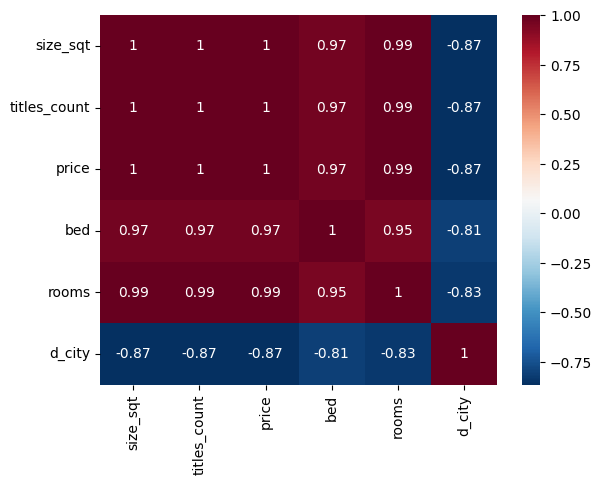

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_mat,annot=True,cmap='RdBu_r')
plt.show()

In [27]:
#removing highly correlated features(>0.9)
upper=correlation_mat.where(
    np.triu(np.ones(correlation_mat.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("highly correlated features to drop:",to_drop)

highly correlated features to drop: ['titles_count', 'price', 'bed', 'rooms']


# **Chi-Square Test**

In [34]:
import pandas as pd
x=pd.DataFrame({
    'gender':[0,1,1,0,1],
    'married':[1,1,0,0,1],
    'income':[20000,35000,60000,50000,70000]
})
x
y=[0,1,1,0,1]


In [35]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
selector=SelectKBest(score_func=chi2,k=2)
x_new=selector.fit_transform(x_scaled,y)
selected_features=x.columns[selector.get_support()]
print("selected features:",selected_features)


selected features: Index(['gender', 'income'], dtype='object')


Scenario: Loan Approval Classification
You are building a classification model to predict whether a loan will be approved.
Dataset features:
Gender (Male/Female)
Marital Status (Yes/No)
Education Level (Graduate/Non-Graduate)
Applicant Income
Property Area (Urban/Rural)
Favorite Color
Loan Status (Approved/Rejected)
You want to identify which categorical features significantly influence loan approval.
❓ Question:
Which filter method is most appropriate here?
Which type of features can be tested using this method?
If “Favorite Color” has a very low chi-square score, what does it indicate?
Why is chi-square suitable only for classification problems?

In [37]:
import pandas as pd
x=pd.DataFrame({
    'gender':[0,1,1,0,1],
    'married':[1,1,0,0,1],
    'education':['graduate','nongraduate','graduate','nongraduate','graduate'],
    'income':[20000,35000,60000,50000,70000],
    'property':['urban','rural','urban','rural','urban'],
    'favorite_color':['red','blue','green','yellow','red'],

})
y=[0,1,1,0,1]

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['education']=le.fit_transform(x['education'])
x['property']=le.fit_transform(x['property'])
x['favorite_color']=le.fit_transform(x['favorite_color'])


In [39]:
x.dtypes

,0
gender,int64
married,int64
education,int64
income,int64
property,int64
favorite_color,int64


In [41]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
selector=SelectKBest(score_func=chi2,k=3)
x_new=selector.fit_transform(x_scaled,y)
selected_features=x.columns[selector.get_support()]
print("selected features:",selected_features)

selected features: Index(['gender', 'income', 'favorite_color'], dtype='object')
